# Capstone - Satellite Data Monitoring forests
####  James Hoang

### Table of Contents:
- Capstone Introduction
- Data Cleaning
- Preliminary EDA
- EDA
- Preprocessing

### Capstone Introduction
Throughout the years we have been able to make technological advancements in order to monitor our global forests however, excessive use of these natural resources has posed the question of the health and impact on our planet. 

By using historical satellite data that monitors various changes in forests, this project aims to analyze forest changes primarily through carbon fluctuations along with tree cover density among different areas of the world. Many of these factors have been known to have a relationship with deforestation thus the project aims to identify patterns within this data and how well these variables perform in predictive power such that we can recognize areas most ideal for logging to reduce the harm to the environment. 

The goal is to develop a model that can predict potential areas at risk for deforestation based on carbon emissions and tree cover changes. The main data was retrieved from 'global forest watch organisation', a company that uses dashboards and interactive maps that take on real-time environmental data. 

In [154]:
# Python Version used 3.12.4
!python --version

Python 3.12.4


# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

from scipy import stats
from collections import Counter

from sklearn.preprocessing import MinMaxScaler

### Data Cleaning

In [6]:
# Assign the aggregate data of carbon data on country (this the same dataset as Subnational1_carbon_data but excluding 'subnational1' feature)
C_data = pd.read_csv('Country_carbon_data.csv')
C_data.shape

(1888, 31)

In [7]:
C_data.head()

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,gfw_forest_carbon_gross_emissions_2023__Mg_CO2e
0,Afghanistan,0,64385715,25912558,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,10,432115,21758845,50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,15,302660,16568110,55,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,20,284357,15782996,56,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,25,254867,14538150,57,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Carbon dataset with subnational1 feature (state/provinces) etc.
C_data2 = pd.read_csv('Subnational1_carbon_data.csv')

In [9]:
C_data2.head()

,country,subnational1,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,gfw_forest_carbon_gross_emissions_2023__Mg_CO2e
0,Afghanistan,Badakhshan,0,4369203,2710943,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Badakhshan,10,10553,454895,43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Badakhshan,15,3074,140579,46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Badakhshan,20,2088,96521,46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Badakhshan,25,1229,57513,47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# We can see a significant number of nulls as well as the datatypes
C_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            1888 non-null   object 
 1   umd_tree_cover_density_2000__threshold             1888 non-null   int64  
 2   umd_tree_cover_extent_2000__ha                     1888 non-null   int64  
 3   gfw_aboveground_carbon_stocks_2000__Mg_C           1888 non-null   int64  
 4   avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1  1888 non-null   int64  
 5   gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1    708 non-null    float64
 6   gfw_forest_carbon_gross_removals__Mg_CO2_yr-1      708 non-null    float64
 7   gfw_forest_carbon_net_flux__Mg_CO2e_yr-1           708 non-null    float64
 8   gfw_forest_carbon_gross_emissions_2001__Mg_CO2e    708 non-null    float64
 9   gfw_fore

#### Understanding The Subnational Carbon Data fields (Data Dictionary)

**country**: country <br>
**umd_tree_cover_density_2000__threshold**: threshold of tree density that are considered as forested <br>
**umd_tree_cover_extent_2000__ha**: area in hectares considered forested areas given a certain threshold <br>
**gfw_aboveground_carbon_stocks_2000__Mg_C**: amount of carbon stored in aboveground biomass in megagrams (Mg) per country as of 2000 <br>
**avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha**: This represents the average amount of carbon stored per hectare <br>
**gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1**: The estimated annual CO2 emissions (in Mg CO2 equivalent) from forests due to deforestation or degradation including CO2 released from biomass when trees are cut down or burned <br>
**gfw_forest_carbon_gross_removals__Mg_CO2_yr-1**: The estimated amount of CO2 removed annually by forests (in Mg CO2 per year) through processes like forest regrowth and afforestation of forests offsets on emissions since they are carbon sinks <br>
**gfw_forest_carbon_net_flux__Mg_CO2e_yr-1**: Emissions minus removals <br>
**gfw_forest_carbon_gross_emissions_[YEAR]__Mg_CO2e**: Annual gross CO2 emissions for each year from 2001 to 2023 <br>

In [12]:
# Rename fields to be more readible
Cleaned_C_data = C_data.rename(columns={'umd_tree_cover_density_2000__threshold': 'canopy_density_threshold_2000',
                                               'umd_tree_cover_extent_2000__ha': 'forested_area_2000',
                                               'gfw_aboveground_carbon_stocks_2000__Mg_C': 'carbon_stored_per_country_2000_mg',
                                               'avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1': 'avg_carbon_stored_per_ha_2000',
                                               'gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1': 'gross_carbon_emissions',
                                               'gfw_forest_carbon_gross_removals__Mg_CO2_yr-1': 'gross_carbon_removed',
                                               'gfw_forest_carbon_net_flux__Mg_CO2e_yr-1': 'net_carbon_emissions',
                                               'gfw_forest_carbon_gross_emissions_2001__Mg_CO2e': 'carbon_emissions_2001',
                                               'gfw_forest_carbon_gross_emissions_2002__Mg_CO2e': 'carbon_emissions_2002',
                                               'gfw_forest_carbon_gross_emissions_2003__Mg_CO2e': 'carbon_emissions_2003',
                                               'gfw_forest_carbon_gross_emissions_2004__Mg_CO2e': 'carbon_emissions_2004',
                                               'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e': 'carbon_emissions_2005',
                                               'gfw_forest_carbon_gross_emissions_2006__Mg_CO2e': 'carbon_emissions_2006',
                                               'gfw_forest_carbon_gross_emissions_2007__Mg_CO2e': 'carbon_emissions_2007',
                                               'gfw_forest_carbon_gross_emissions_2008__Mg_CO2e': 'carbon_emissions_2008',
                                               'gfw_forest_carbon_gross_emissions_2009__Mg_CO2e': 'carbon_emissions_2009',
                                               'gfw_forest_carbon_gross_emissions_2010__Mg_CO2e': 'carbon_emissions_2010',
                                               'gfw_forest_carbon_gross_emissions_2011__Mg_CO2e': 'carbon_emissions_2011',
                                               'gfw_forest_carbon_gross_emissions_2012__Mg_CO2e': 'carbon_emissions_2012',
                                               'gfw_forest_carbon_gross_emissions_2013__Mg_CO2e': 'carbon_emissions_2013',
                                               'gfw_forest_carbon_gross_emissions_2014__Mg_CO2e': 'carbon_emissions_2014',
                                               'gfw_forest_carbon_gross_emissions_2015__Mg_CO2e': 'carbon_emissions_2015',
                                               'gfw_forest_carbon_gross_emissions_2016__Mg_CO2e': 'carbon_emissions_2016',
                                               'gfw_forest_carbon_gross_emissions_2017__Mg_CO2e': 'carbon_emissions_2017',
                                               'gfw_forest_carbon_gross_emissions_2018__Mg_CO2e': 'carbon_emissions_2018',
                                               'gfw_forest_carbon_gross_emissions_2019__Mg_CO2e': 'carbon_emissions_2019',
                                               'gfw_forest_carbon_gross_emissions_2020__Mg_CO2e': 'carbon_emissions_2020',
                                               'gfw_forest_carbon_gross_emissions_2021__Mg_CO2e': 'carbon_emissions_2021',
                                               'gfw_forest_carbon_gross_emissions_2022__Mg_CO2e': 'carbon_emissions_2022',
                                               'gfw_forest_carbon_gross_emissions_2023__Mg_CO2e': 'carbon_emissions_2023',})
# Check changes
Cleaned_C_data.head()
                                

,country,canopy_density_threshold_2000,forested_area_2000,carbon_stored_per_country_2000_mg,avg_carbon_stored_per_ha_2000,gross_carbon_emissions,gross_carbon_removed,net_carbon_emissions,carbon_emissions_2001,carbon_emissions_2002,...,carbon_emissions_2014,carbon_emissions_2015,carbon_emissions_2016,carbon_emissions_2017,carbon_emissions_2018,carbon_emissions_2019,carbon_emissions_2020,carbon_emissions_2021,carbon_emissions_2022,carbon_emissions_2023
0,Afghanistan,0,64385715,25912558,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,10,432115,21758845,50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,15,302660,16568110,55,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,20,284357,15782996,56,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,25,254867,14538150,57,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# checking the sum of nulls is concerning and is due to thresholds 30 and under having no data known from reading the data dict
Cleaned_C_data.isna().sum()

country                                 0
canopy_density_threshold_2000           0
forested_area_2000                      0
carbon_stored_per_country_2000_mg       0
avg_carbon_stored_per_ha_2000           0
gross_carbon_emissions               1180
gross_carbon_removed                 1180
net_carbon_emissions                 1180
carbon_emissions_2001                1180
carbon_emissions_2002                1180
carbon_emissions_2003                1180
carbon_emissions_2004                1180
carbon_emissions_2005                1180
carbon_emissions_2006                1180
carbon_emissions_2007                1180
carbon_emissions_2008                1180
carbon_emissions_2009                1180
carbon_emissions_2010                1180
carbon_emissions_2011                1180
carbon_emissions_2012                1180
carbon_emissions_2013                1180
carbon_emissions_2014                1180
carbon_emissions_2015                1180
carbon_emissions_2016             

Since we don't want to drop these rows since there is still data in these rows we can impute 0 values 

In [15]:
# Checking to see if there are other 0's within a field
num_zeroes = (Cleaned_C_data['gross_carbon_emissions'] == 0).sum()
num_zeroes

78

Since 0 values exist in the dataset in columns we want to imput 0, we can assume that within the context of this data that carbon within these fields was not readily measured

In [17]:
# Get null columns to impute
columns = ['gross_carbon_emissions', 'gross_carbon_removed', 'net_carbon_emissions', 'carbon_emissions_2001', 'carbon_emissions_2002'
          , 'carbon_emissions_2003', 'carbon_emissions_2004', 'carbon_emissions_2005', 'carbon_emissions_2006', 'carbon_emissions_2007'
          , 'carbon_emissions_2008', 'carbon_emissions_2009', 'carbon_emissions_2010', 'carbon_emissions_2011', 'carbon_emissions_2012'
          , 'carbon_emissions_2013', 'carbon_emissions_2014', 'carbon_emissions_2015', 'carbon_emissions_2016', 'carbon_emissions_2017'
          , 'carbon_emissions_2018', 'carbon_emissions_2019', 'carbon_emissions_2020', 'carbon_emissions_2021', 'carbon_emissions_2022'
          , 'carbon_emissions_2023']

In [18]:
# Impute 0 for null columns
Cleaned_C_data[columns] = Cleaned_C_data[columns].fillna(0)

In [19]:
# Verify
Cleaned_C_data.isna().sum()

country                              0
canopy_density_threshold_2000        0
forested_area_2000                   0
carbon_stored_per_country_2000_mg    0
avg_carbon_stored_per_ha_2000        0
gross_carbon_emissions               0
gross_carbon_removed                 0
net_carbon_emissions                 0
carbon_emissions_2001                0
carbon_emissions_2002                0
carbon_emissions_2003                0
carbon_emissions_2004                0
carbon_emissions_2005                0
carbon_emissions_2006                0
carbon_emissions_2007                0
carbon_emissions_2008                0
carbon_emissions_2009                0
carbon_emissions_2010                0
carbon_emissions_2011                0
carbon_emissions_2012                0
carbon_emissions_2013                0
carbon_emissions_2014                0
carbon_emissions_2015                0
carbon_emissions_2016                0
carbon_emissions_2017                0
carbon_emissions_2018    

In [20]:
Cleaned_C_data.duplicated().sum()

0

In [21]:
Cleaned_C_data.head()

,country,canopy_density_threshold_2000,forested_area_2000,carbon_stored_per_country_2000_mg,avg_carbon_stored_per_ha_2000,gross_carbon_emissions,gross_carbon_removed,net_carbon_emissions,carbon_emissions_2001,carbon_emissions_2002,...,carbon_emissions_2014,carbon_emissions_2015,carbon_emissions_2016,carbon_emissions_2017,carbon_emissions_2018,carbon_emissions_2019,carbon_emissions_2020,carbon_emissions_2021,carbon_emissions_2022,carbon_emissions_2023
0,Afghanistan,0,64385715,25912558,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,10,432115,21758845,50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,15,302660,16568110,55,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,20,284357,15782996,56,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,25,254867,14538150,57,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Sum carbon emissions for 2023 by country to see the latest carbon emitters
total_emissions = Cleaned_C_data.groupby('country')['carbon_emissions_2023'].sum()

# Sort for top 5 emissions
top_emissions = total_emissions.sort_values(ascending=False).head(5)
print(top_emissions)

country
Canada                              8.135716e+09
Brazil                              4.868071e+09
Democratic Republic of the Congo    2.383533e+09
Indonesia                           2.361657e+09
United States                       2.083900e+09
Name: carbon_emissions_2023, dtype: float64


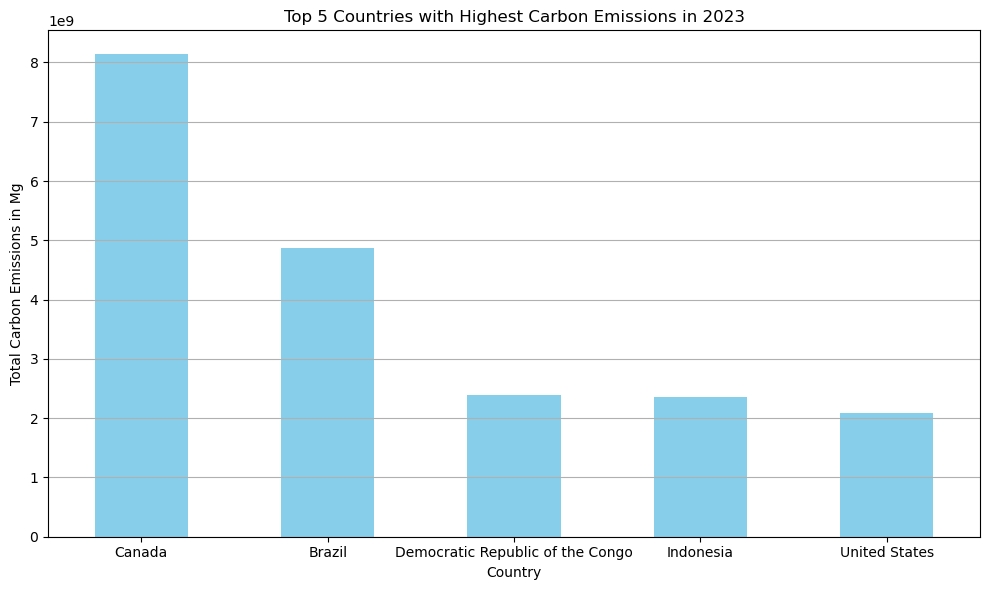

In [23]:
# Plot for top 5 latest carbon emitters
plt.figure(figsize=(10, 6))
top_emissions.plot(color='skyblue', kind='bar')
plt.title('Top 5 Countries with Highest Carbon Emissions in 2023')
plt.xlabel('Country')
plt.ylabel('Total Carbon Emissions in Mg')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Hypothesis:** Brazil's high contribution in carbon emissions is due to the deforestation in the Amazon rainforests. Carbon emissions for US and Canada could also be due to large oil industry

### Tree Cover (Canopy) Data

In [27]:
# Assign the aggregate data of canopy data on country to a variable, (this is a supplementary dataset)
T_data = pd.read_csv('Country_tree_cover_loss.csv')

In [28]:
T_data2 = pd.read_csv('Subnational1_tree_cover_loss.csv')

In [29]:
T_data2.head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
0,Afghanistan,Badakhshan,0,4369203,4369203,4369203,403,3,9,1,...,4,0,0,0,0,0,0,0,0,4
1,Afghanistan,Badakhshan,10,4369203,10553,1763,403,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Afghanistan,Badakhshan,15,4369203,3074,914,403,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,Badakhshan,20,4369203,2088,826,403,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,Badakhshan,25,4369203,1229,474,403,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Understanding The Subnational Tree Cover Data fields

**country**: country <br>
**subnational1**: region/state/province <br>
**threshold**: canopy density that are significant enough to be considered forested <br>
**area_ha**: total available land in hectares of a given area <br>
**extent_2000_ha**: the total land in hectares considered forested in 2000 based on the threshold <br>
**extent_2010_ha**: the total land in hectares considered forested in 2010 based on the threshold  <br>
**gain_2000_2020_ha**: net gain in canopy in hectares from 2000 to 2020 <br>
**tc_loss_ha_[YEAR]**: total loss in hectares of tree cover within the given year<br>

In [31]:
# Does not appear to have any nulls
T_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            1888 non-null   object
 1   threshold          1888 non-null   int64 
 2   area_ha            1888 non-null   int64 
 3   extent_2000_ha     1888 non-null   int64 
 4   extent_2010_ha     1888 non-null   int64 
 5   gain_2000-2020_ha  1888 non-null   int64 
 6   tc_loss_ha_2001    1888 non-null   int64 
 7   tc_loss_ha_2002    1888 non-null   int64 
 8   tc_loss_ha_2003    1888 non-null   int64 
 9   tc_loss_ha_2004    1888 non-null   int64 
 10  tc_loss_ha_2005    1888 non-null   int64 
 11  tc_loss_ha_2006    1888 non-null   int64 
 12  tc_loss_ha_2007    1888 non-null   int64 
 13  tc_loss_ha_2008    1888 non-null   int64 
 14  tc_loss_ha_2009    1888 non-null   int64 
 15  tc_loss_ha_2010    1888 non-null   int64 
 16  tc_loss_ha_2011    1888 non-null   int64 


In [32]:
T_data.isna().sum()

country              0
threshold            0
area_ha              0
extent_2000_ha       0
extent_2010_ha       0
gain_2000-2020_ha    0
tc_loss_ha_2001      0
tc_loss_ha_2002      0
tc_loss_ha_2003      0
tc_loss_ha_2004      0
tc_loss_ha_2005      0
tc_loss_ha_2006      0
tc_loss_ha_2007      0
tc_loss_ha_2008      0
tc_loss_ha_2009      0
tc_loss_ha_2010      0
tc_loss_ha_2011      0
tc_loss_ha_2012      0
tc_loss_ha_2013      0
tc_loss_ha_2014      0
tc_loss_ha_2015      0
tc_loss_ha_2016      0
tc_loss_ha_2017      0
tc_loss_ha_2018      0
tc_loss_ha_2019      0
tc_loss_ha_2020      0
tc_loss_ha_2021      0
tc_loss_ha_2022      0
tc_loss_ha_2023      0
dtype: int64

In [33]:
T_data.duplicated().sum()

0

In [34]:
# Get column range of years from fields
canopy_loss = [f'tc_loss_ha_{year}' for year in range(2001, 2024)]

# Sum canopy loss per year
canopy_loss_per_year = T_data[canopy_loss].sum()

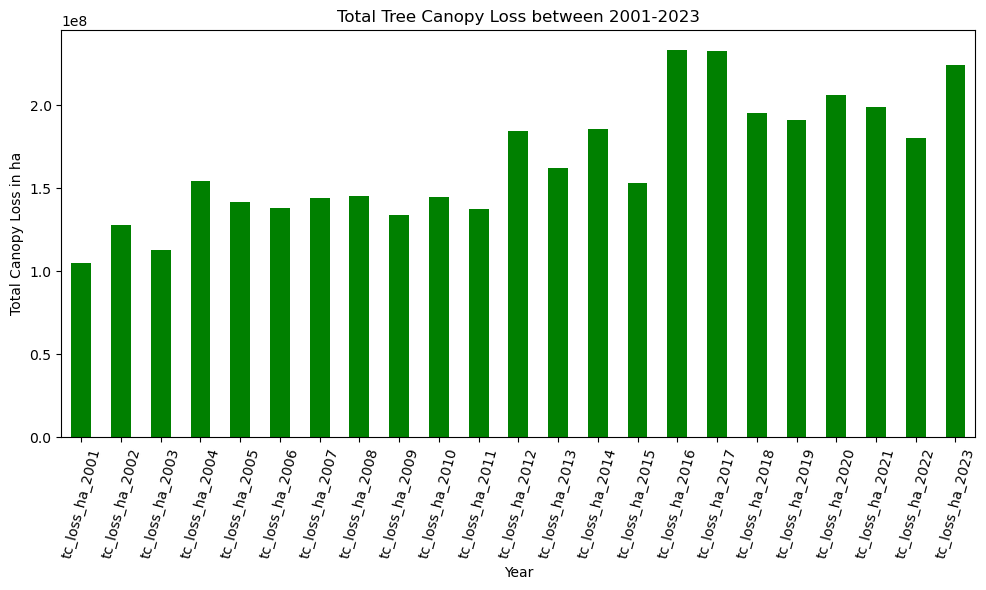

In [35]:
plt.figure(figsize=(10, 6))
canopy_loss_per_year.plot(color='green', kind='bar')
plt.title('Total Tree Canopy Loss between 2001-2023')
plt.xlabel('Year')
plt.ylabel('Total Canopy Loss in ha')
plt.xticks(rotation=75)

plt.tight_layout() 
plt.show()

**Hypothesis**: Since we can see gradual canopy loss, we can theorize and hypothesis that higher threshold (denser forests) suffer from great canopy loss overtime. We can also contextualize possible events that may have happen in the 2015-2016 timeframe such as influx of illegal logging events or policy changes <br>
**Variable Relationships**: From a glance we can presume canopy loss is mildly positvely correlated to year which is an well-known assumption further illustrated <br>

<Figure size 1000x600 with 0 Axes>

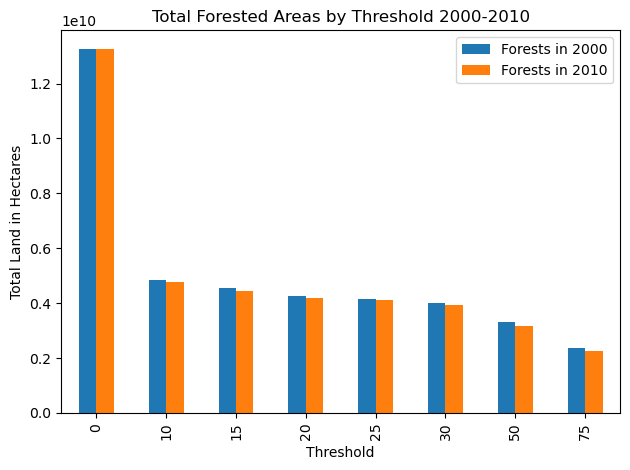

In [37]:
# Quick plot to see threshold variability and changes in forests areas between 10 years
plt.figure(figsize=(10,6))
T_data.groupby('threshold')[['extent_2000_ha', 'extent_2010_ha']].sum().plot(kind='bar')
plt.title('Total Forested Areas by Threshold 2000-2010')
plt.xlabel('Threshold')
plt.ylabel('Total Land in Hectares')
plt.legend(['Forests in 2000', 'Forests in 2010'])

plt.tight_layout()
plt.show()

**Analysis:** 
- Large number of trees are much more sparse than dense given the high sum area coverage with a 0 threshold
- Notable decrease in forests over the decade

## Sprint2

In [40]:
# Change display to view all dataframe features
pd.set_option('display.max_columns', None)

### EDA

Preliminary EDA Findings:
- Gradual canopy density loss over the years (spike in 2015-2016)
- Brazil followed by Canada are huge carbon emitters
- Deforestation is increasing over the past 2 decades from the carbon emissions and tree cover loss

#### **Executive Decision**: Due to high dimensionality within the subnational dataset and the ineffectiveness of Lasso, we use the country dataset instead to evaluate for countries that have the highest contribution to deforestation. This is because the binarize subnational feature resulted in a feature count of over 3000 which poses the question of reliability and effectiveness of potential models. 
 As we pivot our problem initiative, we can instead isolate for countries that contribute to deforestation but we need to determine what exactly how we can develop our metric of evaluation in order to classify 'contribution to deforestation'. Target features to look into would be the amount of forests each country have, its contribution to carbon emissions and total carbon stored within the biomass

To start, we can create a visualization to illustrate which countries contain the largest area of forests along with a threshold condition to show the kind of forests there are

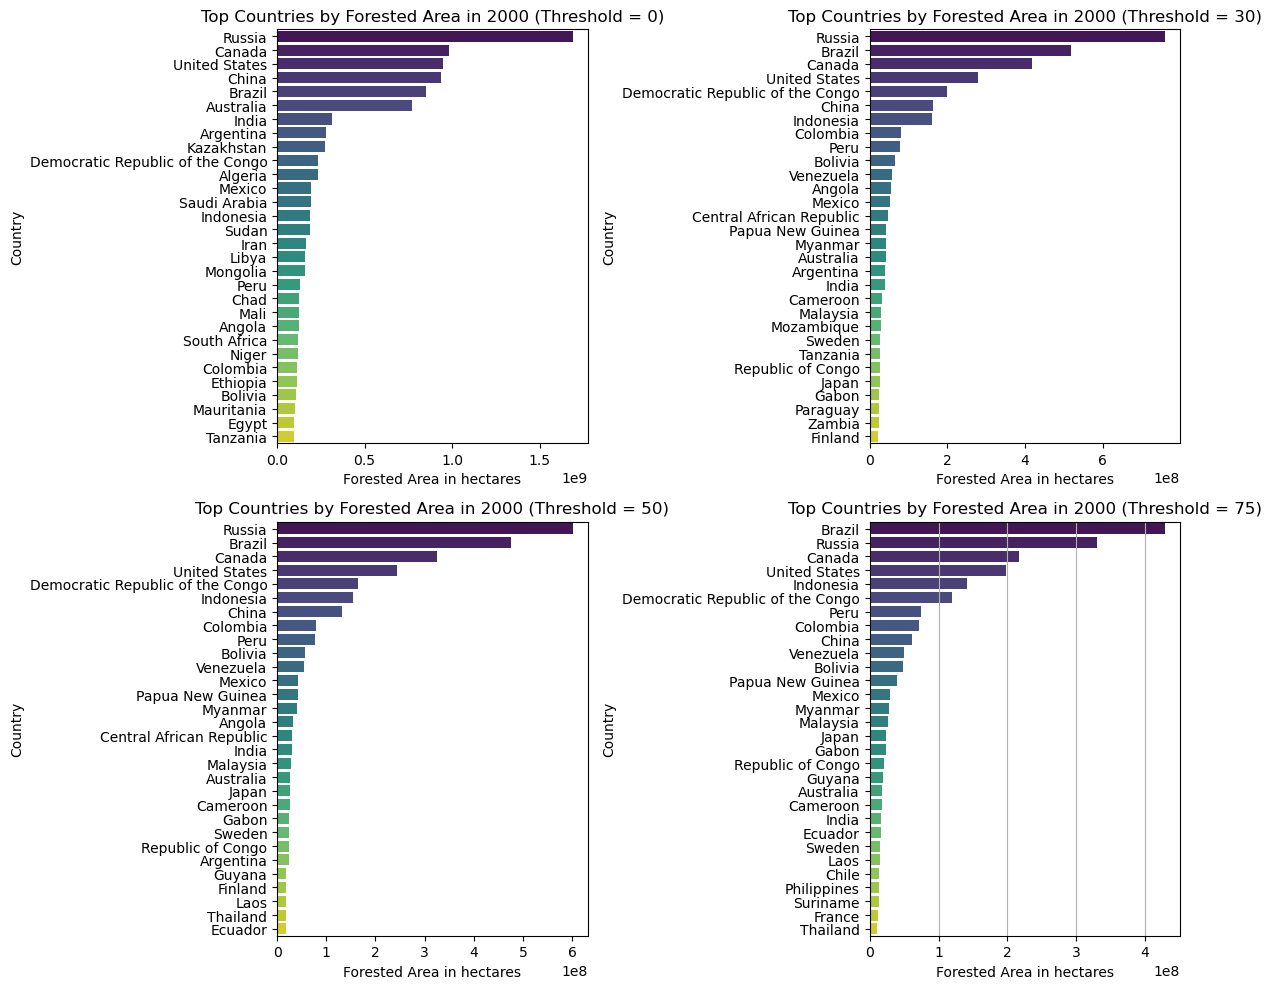

In [45]:
# Create plots for relevant graph thresholds
plt.subplots(2, 2, figsize=(12, 10)) # one row, two columns

plt.subplot(2, 2, 1)
# Threshold is 0
threshold = Cleaned_C_data[Cleaned_C_data['canopy_density_threshold_2000'] == 0]

# Group by country and calculate the sum of forest area
forest_by_country = (threshold.groupby('country')['forested_area_2000'].sum().reset_index())

# Sort by top 30 countries
top_countries = forest_by_country.sort_values(by='forested_area_2000', ascending=False).head(30)

sns.barplot(data=top_countries, x='forested_area_2000', y='country', hue='country',  palette='viridis')
plt.xlabel('Forested Area in hectares')
plt.ylabel('Country')
plt.title('Top Countries by Forested Area in 2000 (Threshold = 0)') 


plt.subplot(2, 2, 2)
# Threshold is 30
threshold = Cleaned_C_data[Cleaned_C_data['canopy_density_threshold_2000'] == 30]

# Group by country and calculate the sum of forest area
forest_by_country = (threshold.groupby('country')['forested_area_2000'].sum().reset_index())

# Sort by top 30 countries
top_countries = forest_by_country.sort_values(by='forested_area_2000', ascending=False).head(30)

sns.barplot(data=top_countries, x='forested_area_2000', y='country', hue='country',  palette='viridis')
plt.xlabel('Forested Area in hectares')
plt.ylabel('Country')
plt.title('Top Countries by Forested Area in 2000 (Threshold = 30)') 


plt.subplot(2, 2, 3)
# Threshold is 50
threshold = Cleaned_C_data[Cleaned_C_data['canopy_density_threshold_2000'] == 50]

# Group by country and calculate the sum of forest area
forest_by_country = (threshold.groupby('country')['forested_area_2000'].sum().reset_index())

# Sort by top 30 countries
top_countries = forest_by_country.sort_values(by='forested_area_2000', ascending=False).head(30)

sns.barplot(data=top_countries, x='forested_area_2000', y='country', hue='country',  palette='viridis')
plt.xlabel('Forested Area in hectares')
plt.ylabel('Country')
plt.title('Top Countries by Forested Area in 2000 (Threshold = 50)') 


plt.subplot(2, 2, 4)
# Threshold is 75
threshold = Cleaned_C_data[Cleaned_C_data['canopy_density_threshold_2000'] == 75]

# Group by country and calculate the sum of forest area
forest_by_country = (threshold.groupby('country')['forested_area_2000'].sum().reset_index())

# Sort by top 30 countries
top_countries = forest_by_country.sort_values(by='forested_area_2000', ascending=False).head(30)

sns.barplot(data=top_countries, x='forested_area_2000', y='country', hue='country',  palette='viridis')
plt.xlabel('Forested Area in hectares')
plt.ylabel('Country')
plt.title('Top Countries by Forested Area in 2000 (Threshold = 75)') 

# Format
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**Analysis**: We look at total forest area at different thresholds. a threshold encompasses all forests within a region and 30, 50, 75 are for denser forests. The reason for these thresholds chosen is given by the problem space and data available. We get a understanding of which countries have the most forests by far by a threshold of 0 and understand how much of the forest is dense forest where deforestation primarily occurs. The dataset excluding subnational1 had null values for thresholds below 30 resulting in data limitations. From this vizualization we can see that Russia, Canada, United States, China, Brazil and Australia make up the largest number of forests however Democratic Republic, Indonesia, Columbia and Peru have much denser forests. 

**Brainstorm**: Since we have an idea of forest coverage, we can have a look to see which countries contribute to carbon emissions despite its coverage

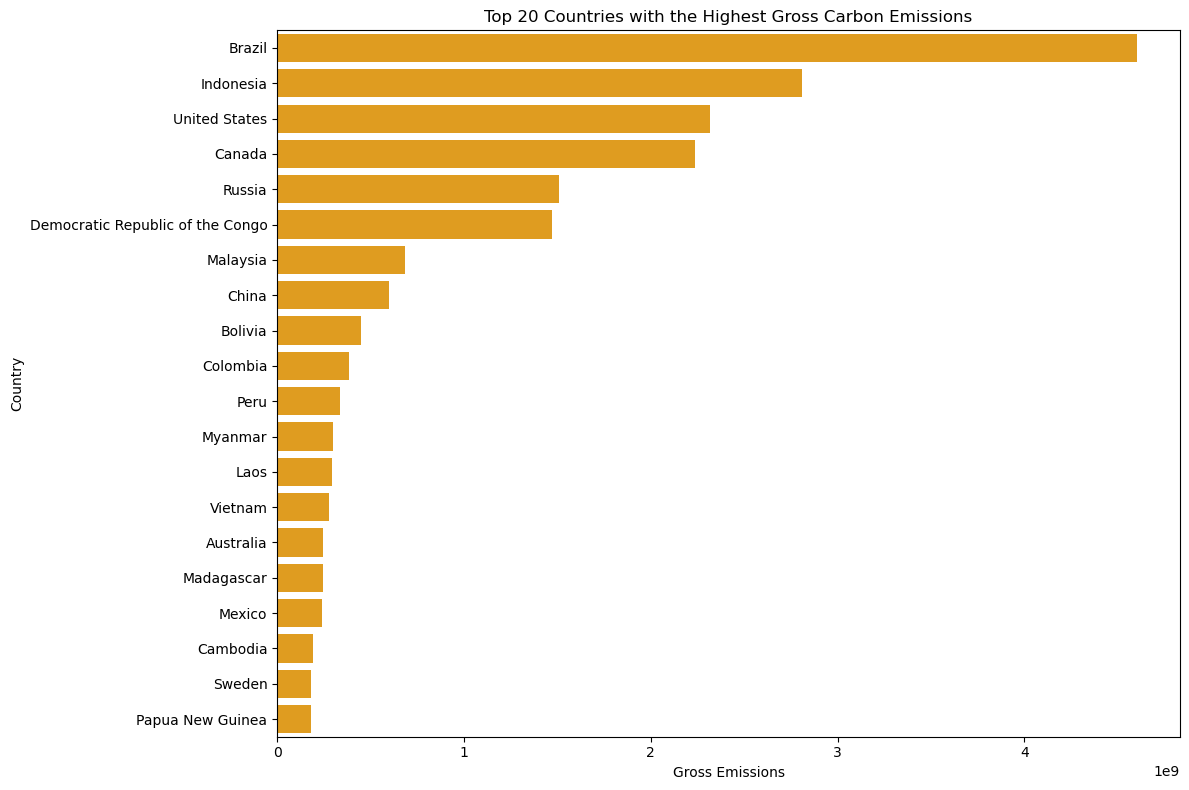

In [48]:
# Filter and sort the dataset by tree cover extent
top_countries = Cleaned_C_data.groupby('country')['gross_carbon_emissions'].sum().sort_values(ascending=False).head(20)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, color='orange')

plt.xlabel("Gross Emissions")
plt.ylabel("Country")
plt.title("Top 20 Countries with the Highest Gross Carbon Emissions")

# Format
plt.tight_layout()
plt.show()

**Analysis**: Given the previous vizualization, there is not too much deviation of what could be expected to contribute to higher carbon amounts. In context, Brazil, Indonesia and Democratic Republic of the Congo are are tropical regions which contain primary forests which are forests that are classified by its minimal amount of human activity. Deforestation has always posed a threat to these tropical regions which is apparent through the gross emissions. On the other hand, the US, Canada and Russia are all high in exporters for timber trade. An interactive visualization here can help demostrate a better understanding of a peice of the context of this data. https://oec.world/en/profile/hs/wood-products?yearSelector1=2020

**Brainstorm**: Part of the this idea can also be explained by the biomass within each country. carbon biomass indirectly contribute to carbon emissions depending on how it is handled as well as insight into some of the forest density as well

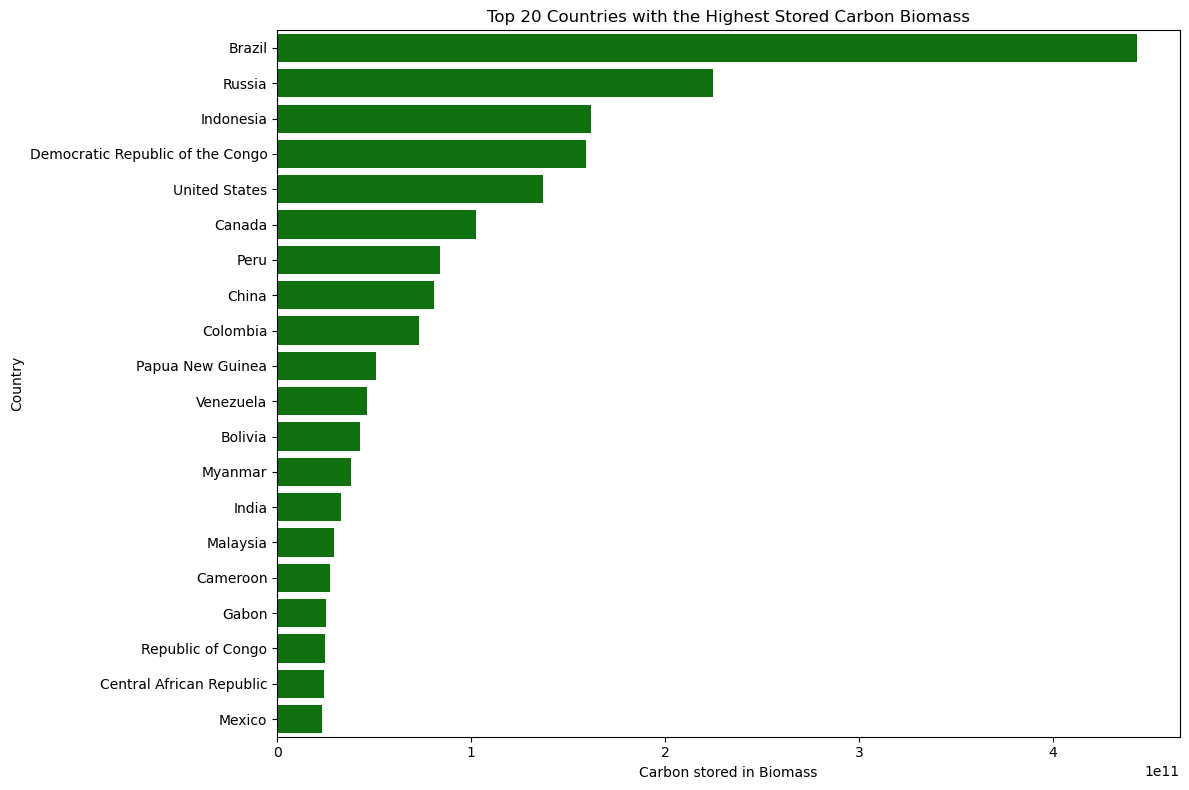

In [51]:
# Filter and sort the dataset by tree cover extent
top_countries = Cleaned_C_data.groupby('country')['carbon_stored_per_country_2000_mg'].sum().sort_values(ascending=False).head(20)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, color='green')

plt.xlabel("Carbon stored in Biomass")
plt.ylabel("Country")
plt.title("Top 20 Countries with the Highest Stored Carbon Biomass")

# Format
plt.tight_layout()
plt.show()

**Analysis**: The 3 primary forest areas of Brazil, Indonesia and Democratic Republic of the Congo are at the top along with Russia. This visual is important to recognize that **logging** within these areas has a higher risk in contributing to deforestation in environmental impact. This is because by nature of environmental data and its context, many variables contribute to the idea of deforestation such as carbon emissions contributing to global warming thus leading to increase in wildfires.

**Brainstorm**: As an general overiew of the problem space, there is also a general understanding that there is a close relationship with carbon emissions and the amount of trees within a given areas (canopy density). Before modeling, we can graph these two features and their change overtime to evaluate their relationship

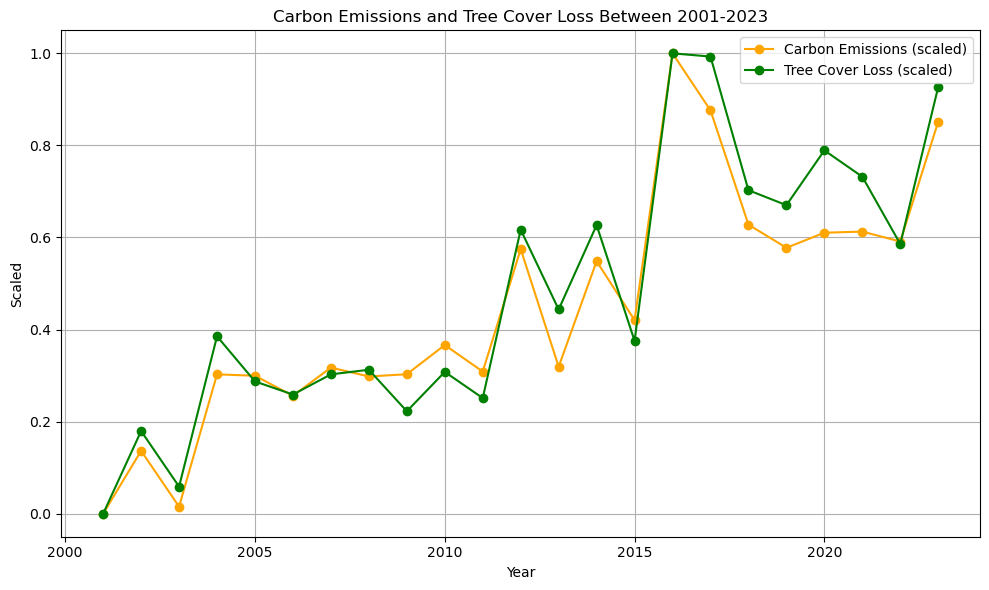

In [71]:
# Define the range of years explicitly
years = list(range(2001, 2024))

# Prepare the data by summing values across the years for both datasets
carbon_emissions = Cleaned_C_data[[f'carbon_emissions_{year}' for year in years]].sum().values
tree_cover_loss = T_data[[f'tc_loss_ha_{year}' for year in years]].sum().values

# Create a DataFrame
data = pd.DataFrame({
    'year': years,
    'carbon_emissions': carbon_emissions,
    'tree_cover_loss': tree_cover_loss
})

# Normalize values using MinMaxScaler
scaler = MinMaxScaler()
data[['carbon_emissions_scaled', 'tree_cover_loss_scaled']] = scaler.fit_transform(data[['carbon_emissions', 'tree_cover_loss']])

# Plot normalized values
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['carbon_emissions_scaled'], label='Carbon Emissions (scaled)', color='orange', marker='o')
plt.plot(data['year'], data['tree_cover_loss_scaled'], label='Tree Cover Loss (scaled)', color='green', marker='o')

plt.xlabel('Year')
plt.ylabel('Scaled')
plt.title('Carbon Emissions and Tree Cover Loss Between 2001-2023')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()

**Analysis**: By scaling the data appropriately and graphing these two metrics together, we can clearly see that there is a very close positive relationship between carbon and tree cover such that we can build two models and find the average of the two to explain our problem space. Therefore, we can try to see how carbon emissions and tree cover loss explain deforestation separetly. One notable speculation from this graph is the significant spike between 2015-2016. To get a better understanding of the cause of these we can increase the granularity by incorporating country data.

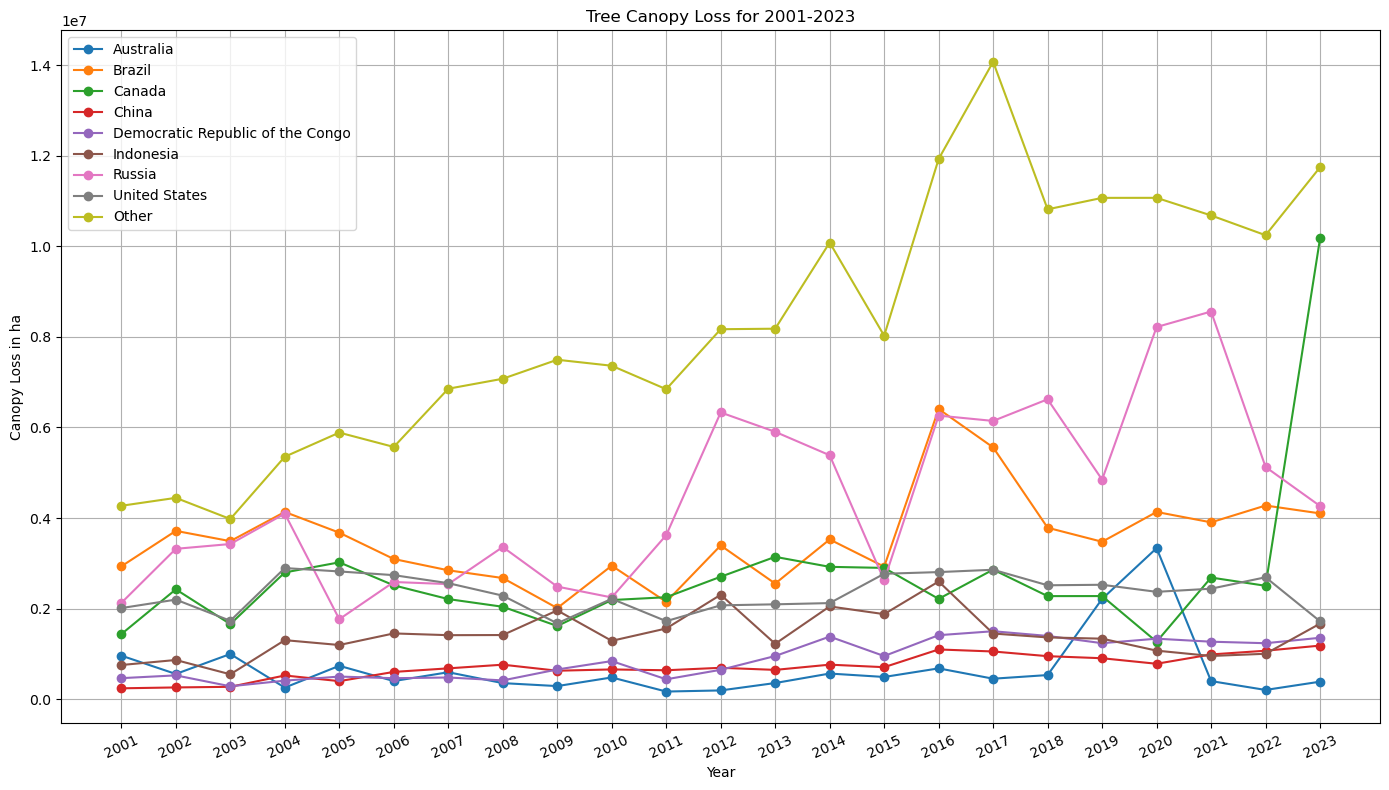

In [292]:
# Selected highest contributing countries
rel_countries = ['Russia', 'Canada', 'United States', 'China', 'Brazil', 'Australia', 'Indonesia', 'Democratic Republic of the Congo']

# Get year ranges
canopy_loss = [f'tc_loss_ha_{year}' for year in range(2001, 2024)]

# Get rows for relevant countries and total area covered (threshold 0)
sub_data = T_data[(T_data['country'].isin(rel_countries)) & (T_data['threshold'] == 0)]

# Combine country and yearly canopy loss
country_canopy_loss = sub_data[['country'] + canopy_loss].copy()

# Set the country column as the index to plot
country_canopy_loss.set_index('country', inplace=True)

# Make years from 2001-2024 to substitute for feature names
years = [str(year) for year in range(2001, 2024)]

# Calculate the sum of other countries not considered to be relevant
other_countries = T_data[~T_data['country'].isin(rel_countries) & (T_data['threshold'] == 0)][canopy_loss].sum()

# Add the "Other" row to the country_canopy_loss DataFrame
country_canopy_loss.loc['Other'] = other_countries

plt.figure(figsize=(14, 8))

# Loop through the countries and plot their canopy loss over the years and include "Other"
for country in country_canopy_loss.index:
    plt.plot(years, country_canopy_loss.loc[country], label=country, marker='o')

plt.title('Tree Canopy Loss for 2001-2023')
plt.xlabel('Year')
plt.ylabel('Canopy Loss in ha')
plt.xticks(rotation=25)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [148]:
# Closer look at the top country values and other
rel_country_data.head(10)

,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,tc_loss_ha_2006,tc_loss_ha_2007,tc_loss_ha_2008,tc_loss_ha_2009,tc_loss_ha_2010,tc_loss_ha_2011,tc_loss_ha_2012,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
Australia,961029,556659,997500,255809,736690,399783,594789,354624,289054,479888,168504,193127,356589,565952,490294,680108,451951,532375,2214075,3335017,399128,203795,386479
Brazil,2933280,3716128,3489399,4133894,3676303,3094939,2845706,2675046,2011101,2947537,2148521,3394353,2552130,3526959,2925777,6407362,5559059,3785395,3475781,4133880,3904438,4275856,4102062
Canada,1436270,2425234,1657861,2798242,3021531,2513417,2210076,2040529,1615789,2188790,2251205,2703613,3142775,2922057,2898419,2214501,2860725,2275740,2276551,1268205,2685437,2503768,10176022
China,239821,259281,272996,523200,398407,601916,680527,761618,628226,656676,638521,692914,646720,762186,706568,1097745,1052994,949613,904024,781941,987800,1069915,1182797
Democratic Republic of the Congo,464121,525661,284677,409234,499127,463098,478573,414564,655768,841115,438994,648793,953092,1381694,952104,1412997,1500188,1396468,1236397,1335551,1269277,1235676,1355527
Indonesia,754497,864973,549191,1303378,1196074,1451761,1413149,1416138,1960378,1288137,1560849,2305404,1222775,2048023,1877564,2598734,1449331,1363601,1336080,1071766,953796,1002529,1668216
Russia,2125734,3320029,3425996,4096964,1765902,2587385,2540838,3359720,2485584,2246524,3621047,6330899,5903391,5386186,2623526,6261650,6143921,6621832,4847067,8217252,8559449,5126743,4264820
United States,2011559,2198246,1731138,2894882,2820364,2738832,2561382,2285848,1674904,2215651,1722824,2072063,2094430,2121647,2769087,2806176,2857682,2514857,2526145,2370218,2439468,2691638,1719447
Other,4270291,4445365,3977760,5353463,5886180,5569557,6855010,7075180,7494754,7362531,6844228,8168980,8180237,10083162,8025059,11928173,14073204,10816270,11069240,11069993,10681371,10244521,11745186


**Analysis**: 
Tree Cover loss sporadicness has increased over time and can be explained through changes within this topic space like wildfires. 

- Russi 2012,  2016, 202:0Ssaw a surge in wildfiresin the Serbian region  <br>
- Canada 2023 Onee of the largest forest fires experience which had the largest influence in 2023 carbon emissions (As a Canadian resident, I experienced the aftermath of this by air quality due to vicinity)  https://www.wri.org/insights/canada-wildfire-emission s<br>
- Brazil2016: Was also a result to forest fire also known from the El Nino Phenomenon around this time which illustracted record temperatures in the central areas of the Amazon https://www.ecmwf.int/en/newsletter/151/meteorology/2015-2016-el-nino-and-beyond#:~:text=The%202015%2F16%20El%20Ni%C3%B1o%20broke%20warming%20records%20in%20the,C%20set%20in%20January%201983.<br>
- Australia 2020: Also largely due to forest fires


**Brainstorm**: On the positive side, lets have a look at which countries have been able to have the most regrowth in forests relative to the amount of forests they started with

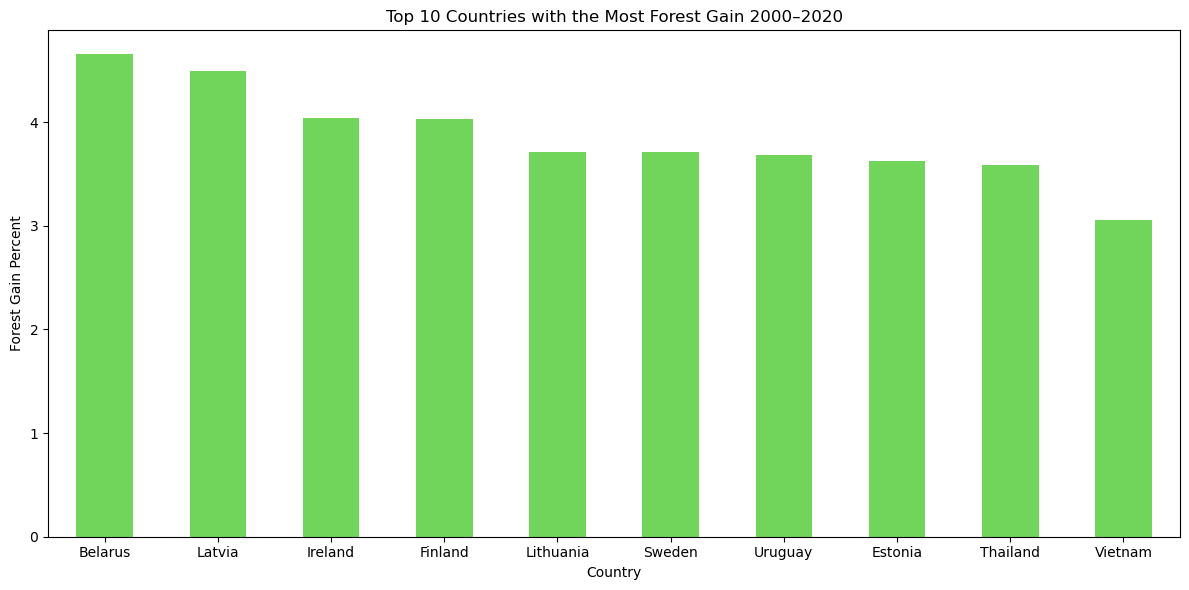

In [290]:
# Filter for rows where threshold is 0
filtered_data = T_data[T_data['threshold'] == 0]

# Group by country and sort top most
country_gain = filtered_data.groupby('country')['gain_2000-2020_ha'].sum().sort_values(ascending=False).head(10)

# Compute percentage gain
country_stats['percent_gain'] = (country_stats['gain_2000-2020_ha'] / country_stats['extent_2000_ha']) * 100

# Sort by percentage gain and select the top 10 countries
top_countries = country_stats.sort_values(by='percent_gain', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_countries['percent_gain'].plot(kind='bar', color='#71d45b')

plt.title('Top 10 Countries with the Most Forest Gain 2000–2020')
plt.xlabel('Country')
plt.ylabel('Forest Gain Percent')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [272]:
country_stats.sort_values(by='percent_gain', ascending=False).head(10)

,gain_2000-2020_ha,extent_2000_ha,percent_gain
country,,,
Belarus,963616,20706912,4.653596
Latvia,290489,6470996,4.489093
Ireland,284263,7036645,4.039752
Finland,1357022,33693918,4.027498
Lithuania,241548,6501663,3.715173
Sweden,1671285,45004558,3.713591
Uruguay,654495,17746574,3.688008
Estonia,165131,4548974,3.630071
Thailand,1842371,51405449,3.583999


**Analysis**: Forest gain seems to be most prominent in these countries located in northern europe which can bring opportunity for better sourced goods

## Preprocessing

In [1154]:
# Sanity check

In [1148]:
Cleaned_C_data.head()

,country,canopy_density_threshold_2000,forested_area_2000,carbon_stored_per_country_2000_mg,avg_carbon_stored_per_ha_2000,gross_carbon_emissions,gross_carbon_removed,net_carbon_emissions,carbon_emissions_2001,carbon_emissions_2002,carbon_emissions_2003,carbon_emissions_2004,carbon_emissions_2005,carbon_emissions_2006,carbon_emissions_2007,carbon_emissions_2008,carbon_emissions_2009,carbon_emissions_2010,carbon_emissions_2011,carbon_emissions_2012,carbon_emissions_2013,carbon_emissions_2014,carbon_emissions_2015,carbon_emissions_2016,carbon_emissions_2017,carbon_emissions_2018,carbon_emissions_2019,carbon_emissions_2020,carbon_emissions_2021,carbon_emissions_2022,carbon_emissions_2023
0,Afghanistan,0,64385715,25912558,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,10,432115,21758845,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,15,302660,16568110,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,20,284357,15782996,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,25,254867,14538150,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1150]:
T_data.head()

,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,tc_loss_ha_2006,tc_loss_ha_2007,tc_loss_ha_2008,tc_loss_ha_2009,tc_loss_ha_2010,tc_loss_ha_2011,tc_loss_ha_2012,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
0,Afghanistan,0,64385715,64385715,64385715,10741,103,214,267,225,268,172,274,122,92,109,134,60,15,9,0,0,0,32,26,46,47,15,133
1,Afghanistan,10,64385715,432115,126247,10741,92,190,253,207,246,159,259,112,74,94,116,41,2,4,0,0,0,28,19,40,37,9,32
2,Afghanistan,15,64385715,302660,106867,10741,91,186,247,205,240,156,256,110,73,92,114,40,2,3,0,0,0,28,18,39,32,8,22
3,Afghanistan,20,64385715,284357,105733,10741,89,180,245,203,238,153,254,108,71,88,114,40,2,3,0,0,0,28,18,39,32,8,22
4,Afghanistan,25,64385715,254867,72395,10741,89,180,245,202,237,153,254,108,71,88,114,39,1,3,0,0,0,27,18,38,28,7,20


In [985]:
# Binarizing countries
Binarize_C_data = pd.get_dummies(Cleaned_C_data, columns=['country'], dtype=int)
Binarize_C_data.shape

(1888, 266)

In [987]:
Binarize_C_data.head()

,canopy_density_threshold_2000,forested_area_2000,carbon_stored_per_country_2000_mg,avg_carbon_stored_per_ha_2000,gross_carbon_emissions,gross_carbon_removed,net_carbon_emissions,carbon_emissions_2001,carbon_emissions_2002,carbon_emissions_2003,carbon_emissions_2004,carbon_emissions_2005,carbon_emissions_2006,carbon_emissions_2007,carbon_emissions_2008,carbon_emissions_2009,carbon_emissions_2010,carbon_emissions_2011,carbon_emissions_2012,carbon_emissions_2013,carbon_emissions_2014,carbon_emissions_2015,carbon_emissions_2016,carbon_emissions_2017,carbon_emissions_2018,carbon_emissions_2019,carbon_emissions_2020,carbon_emissions_2021,carbon_emissions_2022,carbon_emissions_2023,country_Afghanistan,country_Akrotiri and Dhekelia,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,"country_Bonaire, Sint Eustatius and Saba",country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Caspian Sea,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Clipperton Island,country_Colombia,country_Comoros,country_Costa Rica,country_Croatia,country_Cuba,country_Curaçao,country_Cyprus,country_Czech Republic,country_Côte d'Ivoire,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Southern Territories,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guadeloupe,country_Guatemala,country_Guernsey,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle of Man,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kosovo,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Macao,country_Macedonia,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Martinique,country_Mauritania,country_Mauritius,country_Mayotte,country_Mexico,country_Micronesia,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norfolk Island,country_North Korea,country_Northern Cyprus,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Palestina,country_Panama,country_Papua New Guinea,country_Paracel Islands,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Republic of Congo,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Pierre and Miquelon,country_Saint Vincent and the Grenadines,country_Saint-Barthélemy,country_Saint-Martin,country_San Marino,country_Saudi Arabia,country

In [1157]:
Binarize_T_data = pd.get_dummies(T_data, columns=['country'], dtype=int)
Binarize_C_data.shape

(1888, 264)

In [1159]:
Binarize_T_data.head()

,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,tc_loss_ha_2006,tc_loss_ha_2007,tc_loss_ha_2008,tc_loss_ha_2009,tc_loss_ha_2010,tc_loss_ha_2011,tc_loss_ha_2012,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,country_Afghanistan,country_Akrotiri and Dhekelia,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,"country_Bonaire, Sint Eustatius and Saba",country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Caspian Sea,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Clipperton Island,country_Colombia,country_Comoros,country_Costa Rica,country_Croatia,country_Cuba,country_Curaçao,country_Cyprus,country_Czech Republic,country_Côte d'Ivoire,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Southern Territories,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guadeloupe,country_Guatemala,country_Guernsey,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle of Man,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kosovo,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Macao,country_Macedonia,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Martinique,country_Mauritania,country_Mauritius,country_Mayotte,country_Mexico,country_Micronesia,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norfolk Island,country_North Korea,country_Northern Cyprus,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Palestina,country_Panama,country_Papua New Guinea,country_Paracel Islands,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Republic of Congo,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Pierre and Miquelon,country_Saint Vincent and the Grenadines,country_Saint-Barthélemy,country_Saint-Martin,country_San Marino,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spai

In [1171]:
Binarize_C_data.to_csv('binarized_carbon_data.csv', index=False)

In [1173]:
Binarize_T_data.to_csv("binarized_tree_data.csv", index=False)

Lets have a look at the colinearity for all the features except the binarized countries

In [1161]:
view_correlation_C = Cleaned_C_data.drop(['country'], axis=1)

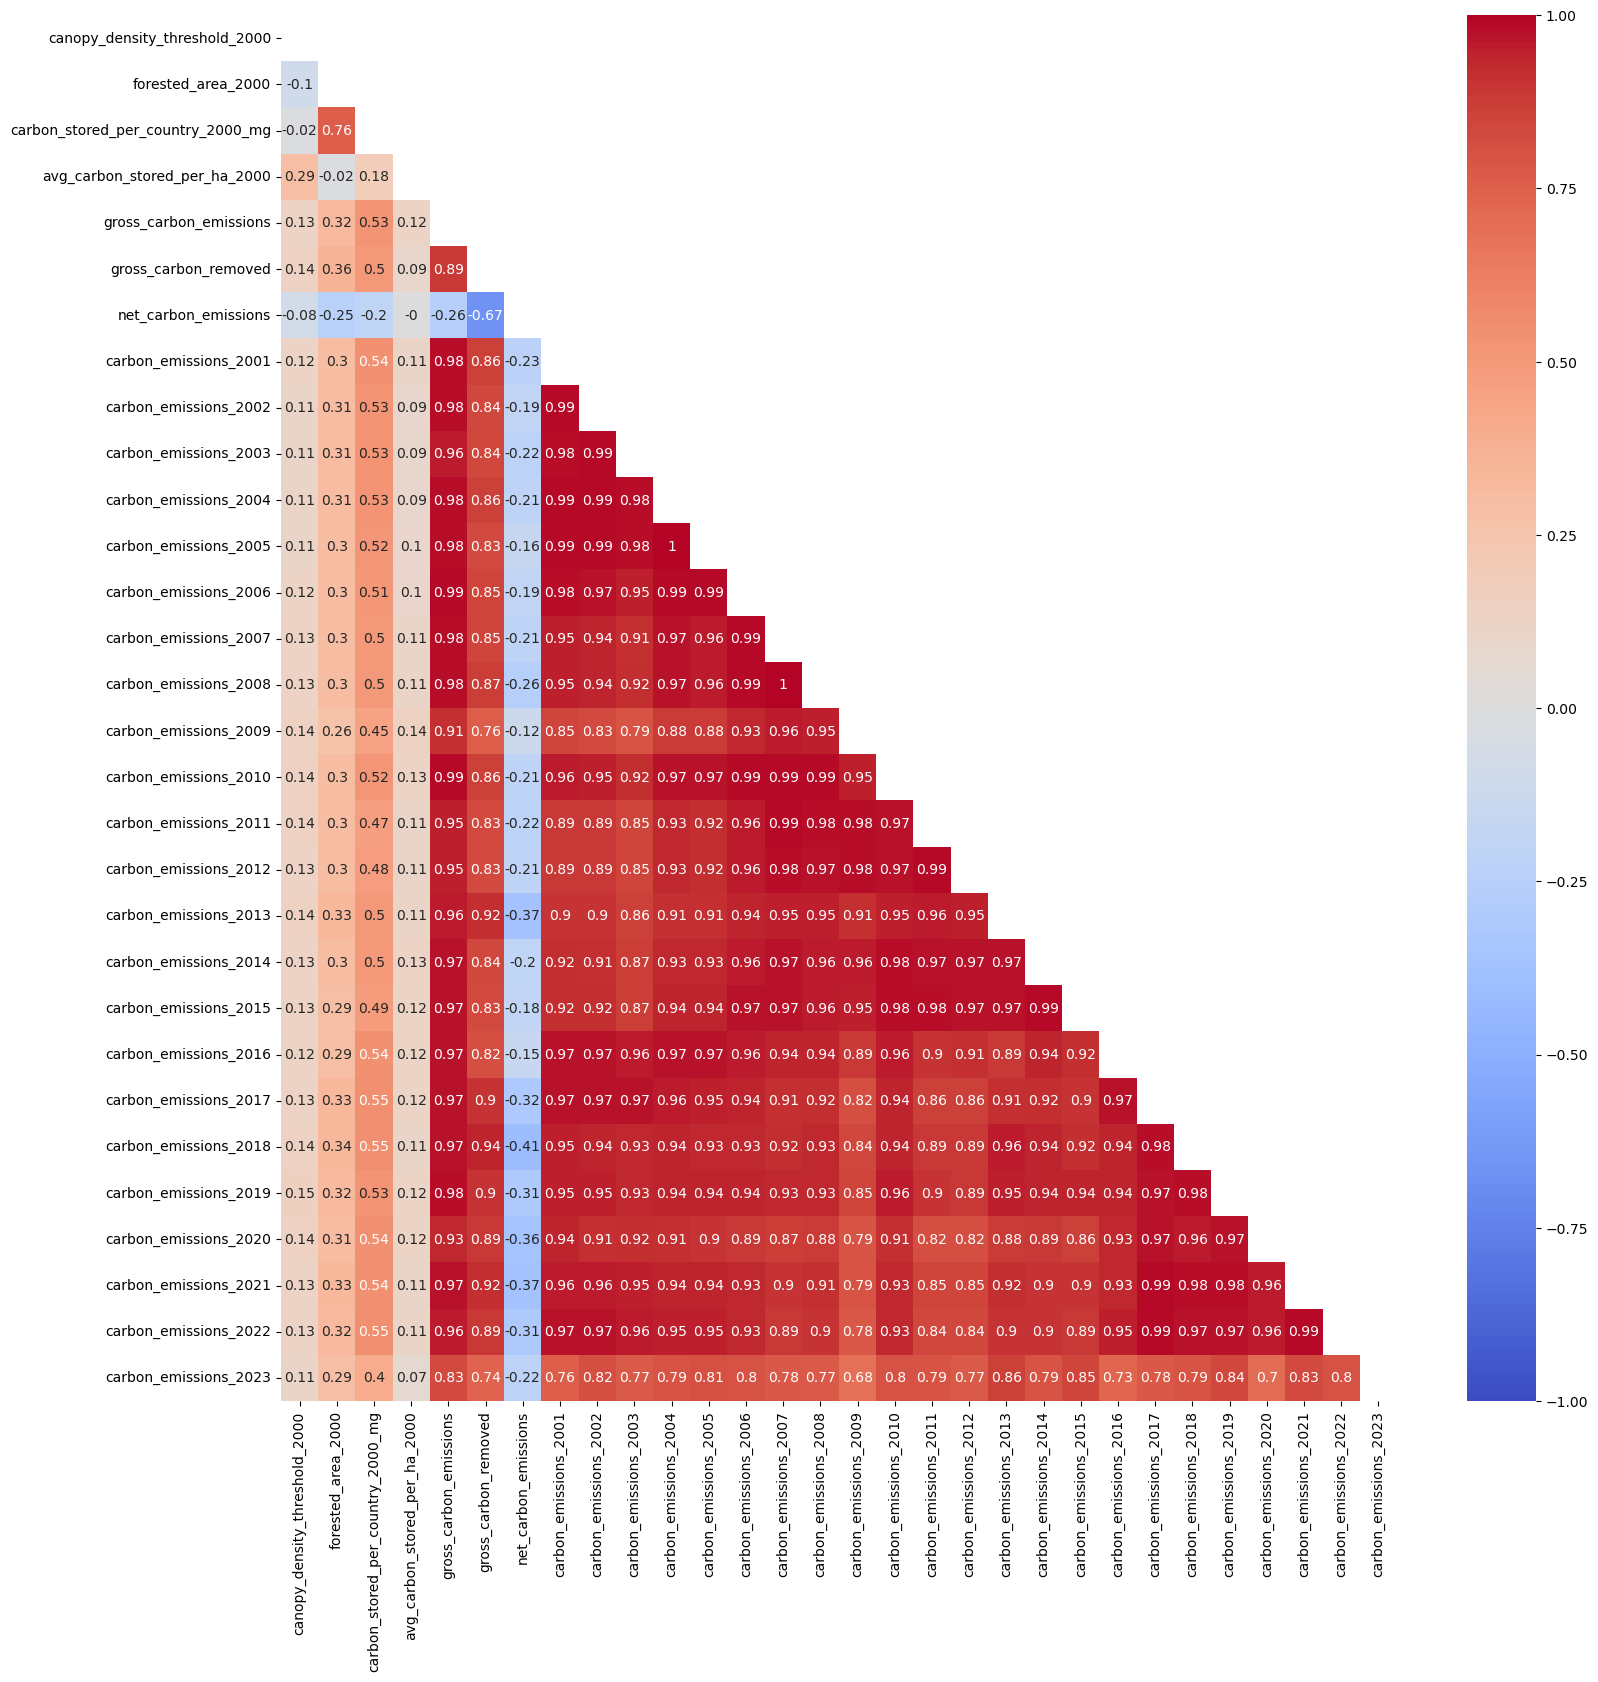

In [1163]:
mask = np.triu(view_correlation_C.corr())

plt.figure(figsize=(18,18))
sns.heatmap(view_correlation_C.corr().round(2), cmap='coolwarm', annot=True, vmax=1, vmin=-1, center=0, mask=mask)
plt.show()

There is very high correlation between carbon emissions over the years which is expected.

In [1167]:
view_correlation_T = T_data.drop(['country'], axis=1)

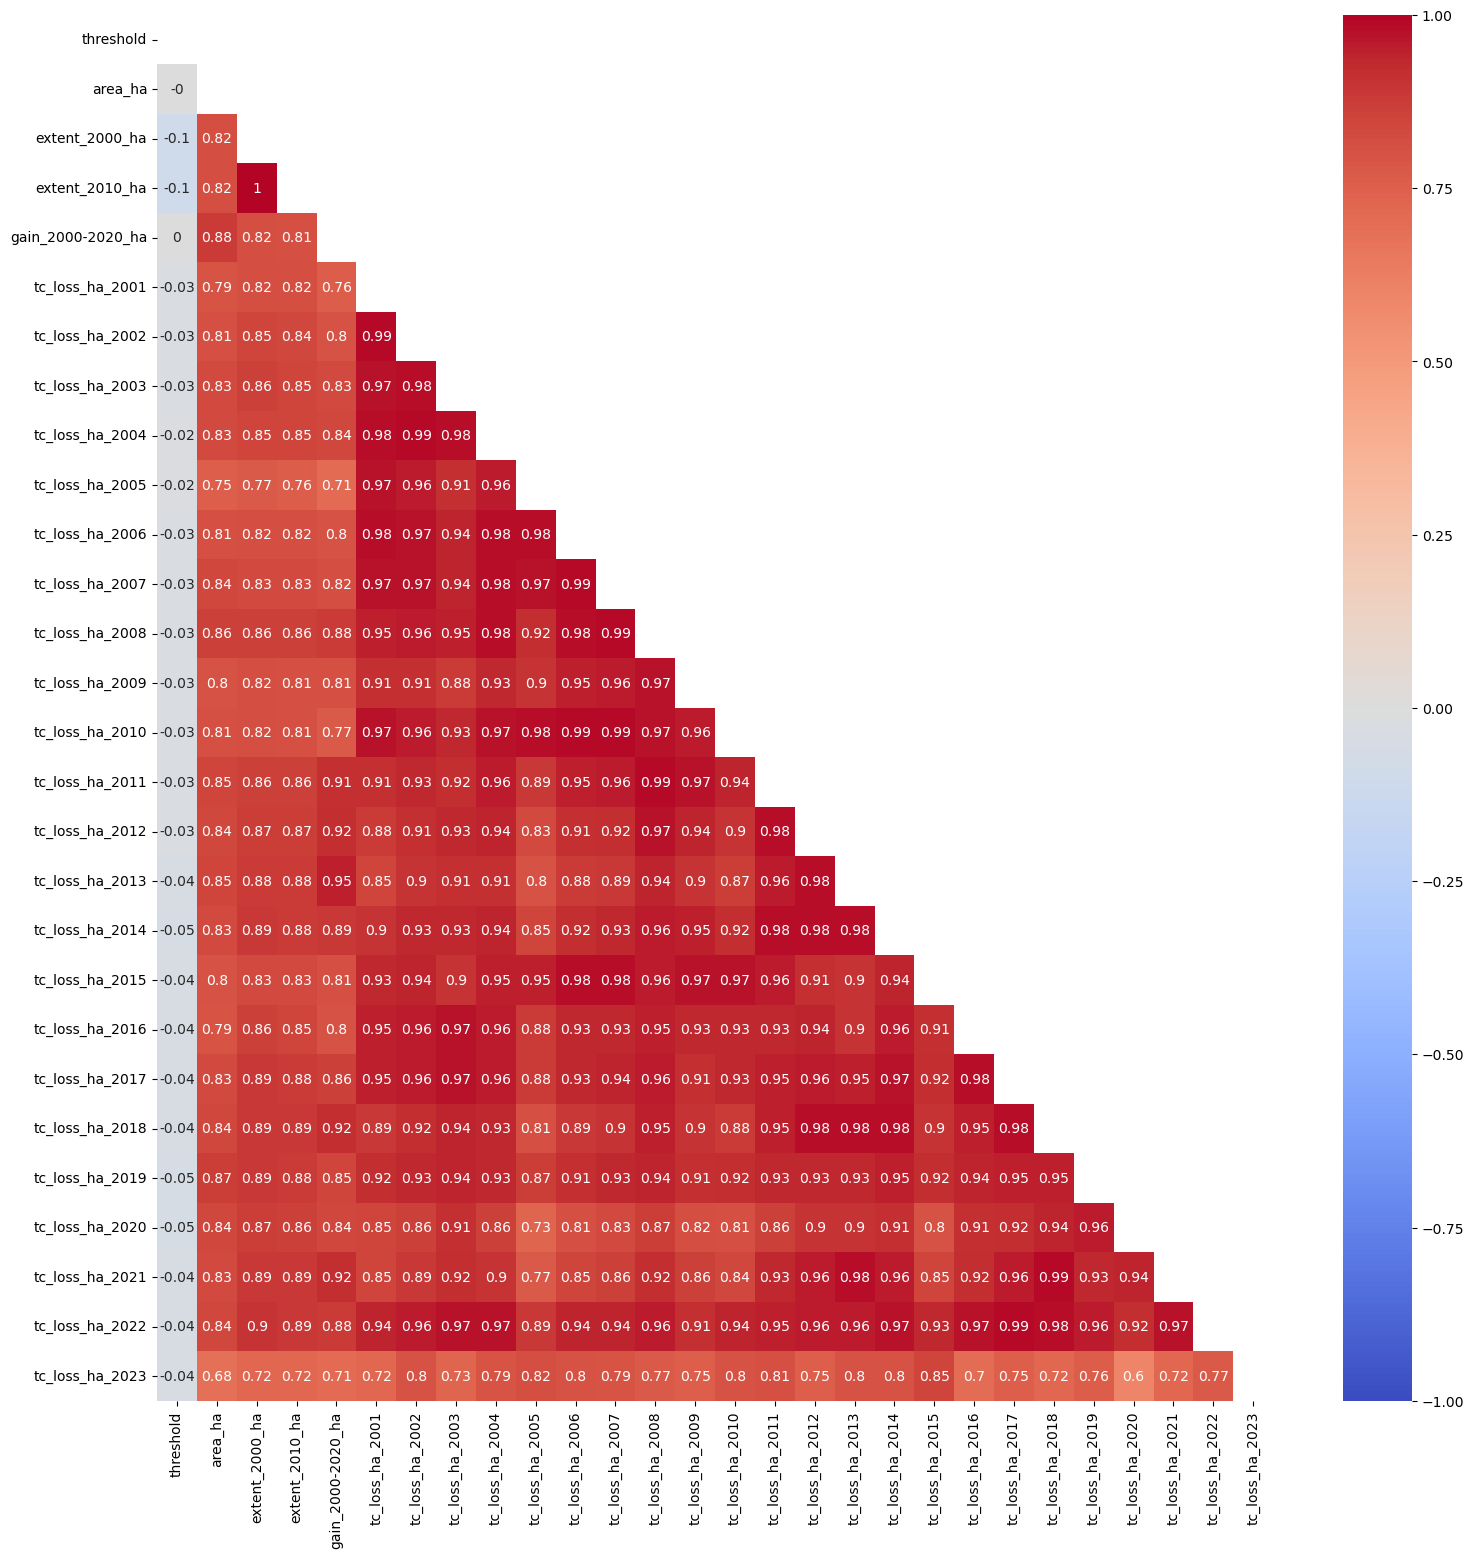

In [1169]:
mask2 = np.triu(view_correlation_T.corr())

plt.figure(figsize=(18,18))
sns.heatmap(view_correlation_T.corr().round(2), cmap='coolwarm', annot=True, vmax=1, vmin=-1, center=0, mask=mask2)
plt.show()

**Analysis**: High correlation can pose a problem for the models for overfitting